<a href="https://colab.research.google.com/github/cam2149/MachinelearningI/blob/main/Examen3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada

## Aprendizaje Automatico 1

## Examen 3

### Integrantes

- Yesid Castelblanco
- Andres Felipe Borrero
- Carlos Alberto Martinez Ramirez
- Nicolas Colmenares

### **Profesores**

- Santiago Ortiz
- Henry Velasco

**Notas:**
-	Todas las respuestas, gráficas, tablas y operaciones deben ser debidamente justificadas.
-	La información que sea obtenida de alguna fuente debe ser citada y referenciada en el documento a entregar.


In [ ]:
# Importar librería pandas y numpy
# Pandas es una librería de Python que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
import pandas as pd
# NumPy es una librería de Python que proporciona estructuras de datos y operaciones matemáticas de alto rendimiento.
import numpy as np
#Matplotlib.pyplot es una librería de Python que proporciona herramientas de visualización y gráficos de alta calidad.
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
#Seaborn es una librería de Python que proporciona herramientas de visualización y análisis de datos de alta calidad.
import seaborn as sns

from sklearn.model_selection import train_test_split


#métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import time

#Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

#sns.set(color_codes=True) es un método de la librería Seaborn que establece los códigos de color predeterminados para los gráficos y diagramas. Cuando se establece color_codes=True, Seaborn utiliza una paleta de colores predefinida y asigna un código de color a cada categoría o variable en los gráficos y diagramas.
sns.set(color_codes=True)
#Cuando se establece rc={'figure.figsize':(10,6)}, Seaborn crea figuras con un tamaño de 10 unidades de ancho y 6 unidades de alto.
sns.set(rc={'figure.figsize':(10,6)})
import warnings
warnings.filterwarnings('ignore')

# Ejercicio 3

3)	El conjunto de datos conocido como *“California Housing Dataset”* puede ser cargado del paquete **sklearn**. La variable objetivo es el valor medio de la vivienda para los distritos de California, expresado en cientos de miles de dólares ($100000). Este conjunto de datos se derivó del censo de EE.UU. de 1990, usando como unidad de censo el grupo de bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de EE.UU. publica datos de muestra (un grupo de bloque generalmente tiene una población de 600 a 3000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el promedio. El número de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas

columnas pueden tomar valores sorprendentemente grandes para grupos de bloques con pocos hogares y muchas casas vacías, como centros vacacionales.
* Lea el conjunto de datos usando la función **fetch_california_housing** del paquete **sklearn.datasets**, guardelos en una variable llamada **california_housing** y con el comando `print(california_housing.DESCR)` observe la descripción general del dataset y en especial qué es cada una de las variables de entrada.
* Separe las variables explicativas **X** de la variable respuesta **Y**, para acceder a ellas use los comandos `california_housing.data` y `california_housing.target`. Considere la conveniencia de incluir las variables Longitud y Latitud al modelo. Haga un análisis exploratorio de las correlaciones entre las variables y comente al respecto.
* Ajuste un modelo de regresión **Elastic-Net** con un coeficiente de penalización pequeño, iterativamente ajuste este valor para eliminar variables explicativas y corregir el problema de multicolinealidad, en cada iteración calcule las correlaciones de las variables explicativas y pare cuando no se encuentren correlaciones altas.


In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
X = california_housing.data
Y = california_housing.target

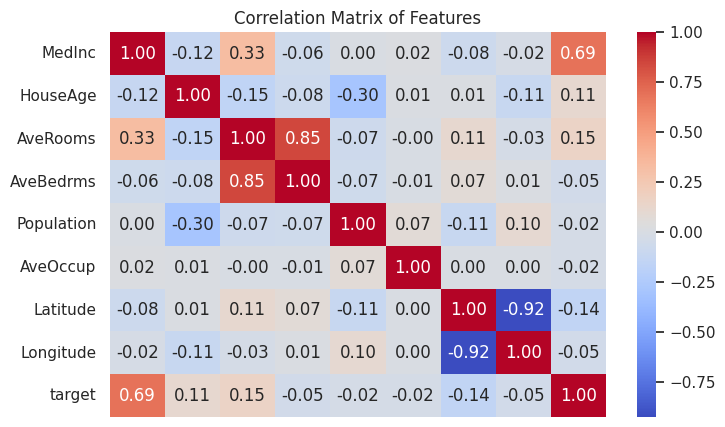

In [ ]:
df = pd.DataFrame(X, columns=california_housing.feature_names)
df['target'] = Y

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.set(xlabel="",ylabel="")
ax.xaxis.set_visible(False)

plt.title('Correlation Matrix of Features')

plt.show()

En la matriz de correlación, se observa una fuerte correlación entre las variables "AveRooms" y "AveBedrms", así como entre la latitud y la longitud. Entre las demás variables, la correlación es leve o nula.

La correlación entre las variables explicativas y la variable objetivo es débil para todas, excepto para la variable **MedInc**.

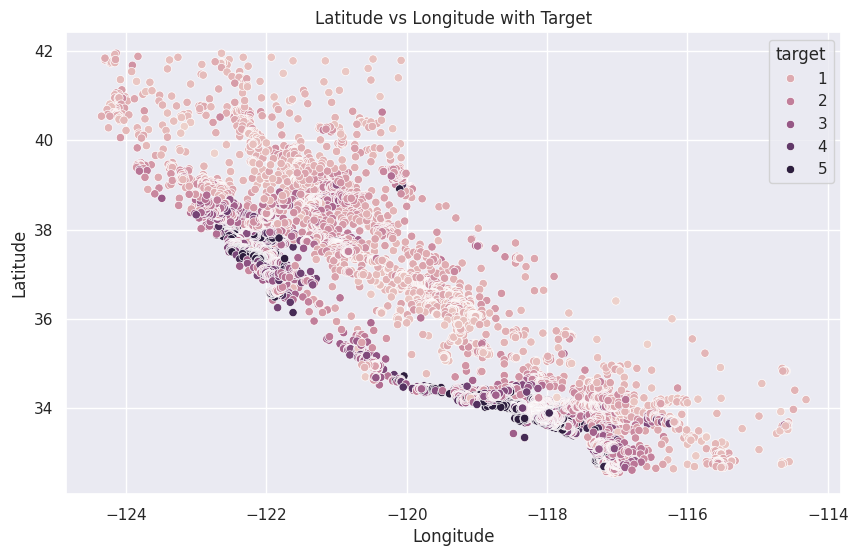

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='target')
plt.title('Latitude vs Longitude with Target')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Considerando el caso de estudio en el que la ubicación de una vivienda influye en su valor, y basándonos en el gráfico anterior que muestra que ciertas regiones presentan valores similares, se decidió incluir la longitud y la latitud en el modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Función para calcular la correlación entre variables explicativas
def calculate_correlations(X):
    correlation_threshold = 0.8  # Umbral para alta correlación
    corr_matrix = pd.DataFrame(X).corr().abs()
    return np.any(corr_matrix.values[np.triu_indices_from(corr_matrix.values, 1)] > correlation_threshold)

In [ ]:
df_x_train = pd.DataFrame(X_train, columns=california_housing.feature_names)

In [ ]:
# Parámetros iniciales
alpha = 0.01   # Penalización inicial pequeña
l1_ratio = 0.5  # Proporción entre lasso y ridge en Elastic-Net

# Ajuste iterativo del modelo
while True:
    print(f"Iniciando el modelo con una penalización de {alpha}")
    # Definir y ajustar el modelo Elastic-Net
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42)
    model.fit(X_train, y_train)

    # Filtrar variables con coeficientes no nulos (las que quedan en el modelo)
    non_zero_coefficients = model.coef_ != 0
    X_train_filtered = df_x_train.iloc[:, non_zero_coefficients]

    # Calcular la correlación entre variables explicativas restantes
    if not calculate_correlations(X_train_filtered):
        print("No hay correlaciones altas entre las variables explicativas. Proceso terminado.")
        break

    # Aumentar la penalización y continuar
    alpha += 0.01
    print(f"Aumentando penalización a {alpha}")

In [ ]:
print(f"Número de variables restantes: {X_train_filtered.shape[1]}")
print(f"Columnas restantes: {X_train_filtered.columns.values}")
print(f"alpha optimo: {alpha:.2f}")

Número de variables restantes: 5
Columnas restantes: ['MedInc' 'HouseAge' 'Population' 'AveOccup' 'Latitude']
alpha optimo: 0.27
